# Functionality: generate simulated 2-d locations of all channels


## Packages import

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from decimal import Decimal
import glob

import pandas as pd

import pickle
import os, sys

import IPython

In [2]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)

# importfunction in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

from util.gen_pointcluster import genpointcluster_circle, genpointcluster_less4

importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/gen_pointcluster.ipynb


## exp subfolders

In [3]:
datafolder, codefolder, pipelinefolder, _= exp_subfolders()

## nb_name

In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

## Load chn_brainarea information

In [16]:
inputfolder = os.path.join(pipelinefolder,'NHP_Pinky','1_dataAnaly', 'FCAnaly', 'SKT','m1_STKData_calcciCOH_reachPhase_Fre9-11Hz')

files = glob.glob(os.path.join(inputfolder, '*.pickle'))
ciCOHfile = files[0]


# load dictionary ciCOH
dic_ciCOH = pickle.load(open(ciCOHfile, "rb" ))

In [18]:
brainarea = dic_ciCOH['brainareas']

In [20]:
print(brainarea)

['M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1'
 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'M1' 'lSMA' 'lSMA'
 'lVA' 'lVA' 'lVPLo' 'lSMA' 'lCd' 'lVLo' 'lVPLo' 'lSMA' 'lCd' 'lVLo'
 'lVPLo' 'rSMA' 'rMC' 'rVLo' 'rVLo' 'rVPLo' 'rSMA' 'rMC' 'rVA' 'rVPLo'
 'rSMA' 'rSMA' 'rVA' 'rVA' 'rVPLo' 'STN5-6' 'GP6-7']


## Simulated Coordinates

In [21]:
# simulated x, y coordinates (np.ndarray, (npoints,2)) of all channels
chnInf_simulatedCoord = np.zeros((len(brainarea), 2))

### Simulate coordinates of M1 channels

In [22]:
chnInf_simulatedCoord[brainarea == 'M1', :] = genpointcluster_circle(rs = [0.02, 0.04, 0.06, 0.08], ns = [3, 17, 31, 45], center = [0, 0])

### Simulate coordinates of ThaSMA channels 

In [23]:
x0, y0 = -0.15, -0.15

x_space, y_space = 0.1, 0.05

y_min = y0

#### first layer:SMA

In [24]:
"""
    first layer: SMA
"""

## lSMA ##

area = 'lSMA'

# parameters setup for lSMA
x_lSMA, y_lSMA = x0, y0
xy_lefttop = (x_lSMA, y_lSMA)

# generate coord_points of lSMA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rSMA ##

area = 'rSMA'

# parameters setup for rSMA
x_rSMA, y_rSMA = x_lSMA + x_space, y_lSMA
xy_lefttop = (x_rSMA, y_rSMA)

# generate coord_points of rSMA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### second layer: rMC

In [25]:
"""
    second layer: rMC
"""

## rMC ##

area = 'rMC'

# parameters setup for rMC
x_rMC, y_rMC = x0 + x_space, y_min - y_space
xy_lefttop = (x_rMC, y_rMC)

# generate coord_points of rMC
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### third layer: VA

In [26]:
"""
    third layer: VA
"""

## lVA ##

area = 'lVA'

# parameters setup for lVA
x_lVA, y_lVA = x0, y_min - y_space
xy_lefttop = (x_lVA, y_lVA)

# generate coord_points of lVA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord


## rVA ##

area = 'rVA'

# parameters setup for rVA
x_rVA, y_rVA = x_lVA + x_space, y_lVA
xy_lefttop = (x_rVA, y_rVA)

# generate coord_points of rVA
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### fourth layer: VLo

In [27]:
"""
    fourth layer: VLo
"""

## lVLo ##

area = 'lVLo'

# parameters setup for lVLo
x_lVLo, y_lVLo = x0, y_min - y_space
xy_lefttop = (x_lVLo, y_lVLo)

# generate coord_points of lVLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rVLo ##

area = 'rVLo'

# parameters setup for rVLo
x_rVLo, y_rVLo = x_lVLo + x_space, y_lVLo
xy_lefttop = (x_rVLo, y_rVLo)

# generate coord_points of rVLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### fifth layer: VPLo

In [28]:
"""
    fifth layer: VPLo
"""

## lVPLo ##

area = 'lVPLo'

# parameters setup for lVPLo
x_lVPLo, y_lVPLo = x0, y_min - y_space
xy_lefttop = (x_lVPLo, y_lVPLo)

# generate coord_points of lVPLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord



## rVPLo ##

area = 'rVPLo'

# parameters setup for rVPLo
x_rVPLo, y_rVPLo = x_lVPLo + x_space, y_lVPLo
xy_lefttop = (x_rVPLo, y_rVPLo)

# generate coord_points of rVPLo
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

#### Sixth layer: lCd

In [29]:
"""
    sixth layer: lCd
"""

## lCd ##

area = 'lCd'

# parameters setup for rCd
x_rCd, y_rCd = x0, y_min - y_space
xy_lefttop = (x_rCd, y_rCd)

# generate coord_points of rCd
nchn_area = len(brainarea[brainarea == area])
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)

# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[brainarea == area, :] = simulatedCoord

# y_min
if np.round(np.min(simulatedCoord[:,1]) * 100) /100 < y_min:
    y_min = np.round(np.min(simulatedCoord[:,1]) * 100) /100

del area, nchn_area, xy_lefttop, simulatedCoord

### Simulate coordinates of STN and DBS channels

In [57]:
# STN
area = 'STN'


# parameters setup for STN
x_STN, y_STN = 0.02, -0.3

xy_lefttop = (x_STN, y_STN)

# generate coord_points
idx_area = [i for i, barea in enumerate(brainarea) if area in barea]
nchn_area = len(idx_area)
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)


# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[idx_area, :] = simulatedCoord

del area, nchn_area, xy_lefttop, simulatedCoord

In [58]:
# GP
area = 'GP'


# parameters setup for STN
x_STN, y_STN = 0.05, -0.2

xy_lefttop = (x_STN, y_STN)

# generate coord_points
idx_area = [i for i, barea in enumerate(brainarea) if area in barea]
nchn_area = len(idx_area)
simulatedCoord = genpointcluster_less4(npoints = nchn_area, xy_lefttop = xy_lefttop, space_x = 0.02, space_y = 0.02)


# assign to chnInf_simulatedCoord
chnInf_simulatedCoord[idx_area, :] = simulatedCoord

del area, nchn_area, xy_lefttop, simulatedCoord

In [49]:
print(chnInf_simulatedCoord)

[[ 0.02        0.        ]
 [-0.01        0.01732051]
 [-0.01       -0.01732051]
 [ 0.04        0.        ]
 [ 0.03729889  0.01444967]
 [ 0.02956036  0.02694783]
 [ 0.01782953  0.03580653]
 [ 0.00369073  0.03982937]
 [-0.01094652  0.03847303]
 [-0.02410539  0.03192069]
 [-0.03400869  0.02105729]
 [-0.03931892  0.00734998]
 [-0.03931892 -0.00734998]
 [-0.03400869 -0.02105729]
 [-0.02410539 -0.03192069]
 [-0.01094652 -0.03847303]
 [ 0.00369073 -0.03982937]
 [ 0.01782953 -0.03580653]
 [ 0.02956036 -0.02694783]
 [ 0.03729889 -0.01444967]
 [ 0.06        0.        ]
 [ 0.0587718   0.01207791]
 [ 0.05513747  0.02366135]
 [ 0.04924581  0.03427609]
 [ 0.04133802  0.04348757]
 [ 0.03173784  0.05091866]
 [ 0.02083832  0.05626513]
 [ 0.00908567  0.0593081 ]
 [-0.00303895  0.05992299]
 [-0.01503915  0.05808463]
 [-0.02642365  0.05386827]
 [-0.03672636  0.04744654]
 [-0.04552549  0.03908235]
 [-0.0524608   0.02911812]
 [-0.05724836  0.01796179]
 [-0.05969216  0.0060701 ]
 [-0.05969216 -0.0060701 ]
 

## Save 

In [60]:
# save folder is the corresponding folder in pipelinefolder
savefolder = code_corresfolder(os.getcwd(), nb_name)

filename = 'chn_brainArea_simCoord_M1ThaSMADBS.csv'

savefile = os.path.join(savefolder, filename)

In [68]:
# assign chnInf_simulatedCoord
simulated_xy = dict()
simulated_xy['brainarea'] = brainarea
simulated_xy['simulated_x'], simulated_xy['simulated_y'] = chnInf_simulatedCoord[:,0], chnInf_simulatedCoord[:,1]

In [69]:
df = pd.DataFrame(simulated_xy)
df.to_csv(savefile, index = False)


## Plot

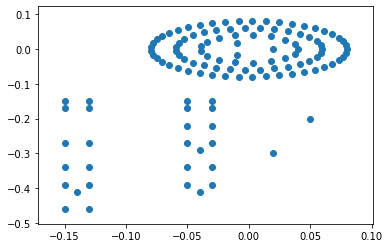

In [59]:
fig, ax = plt.subplots()

ax.scatter(chnInf_simulatedCoord[:,0], chnInf_simulatedCoord[:,1])